In [23]:
#Importing the required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [24]:
#read the dataset
df =pd.read_csv("diabetes.csv")

In [25]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")

Number of Rows : 768 
Number of Columns : 9


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


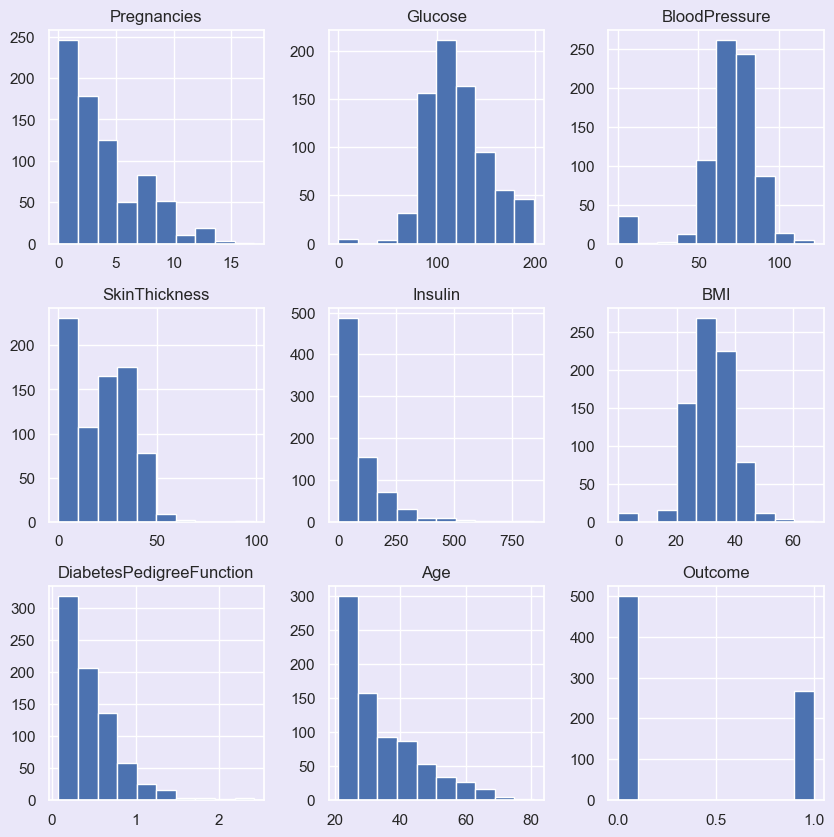

In [29]:
#Data visualization
df.hist(figsize = (10,10))
plt.show()

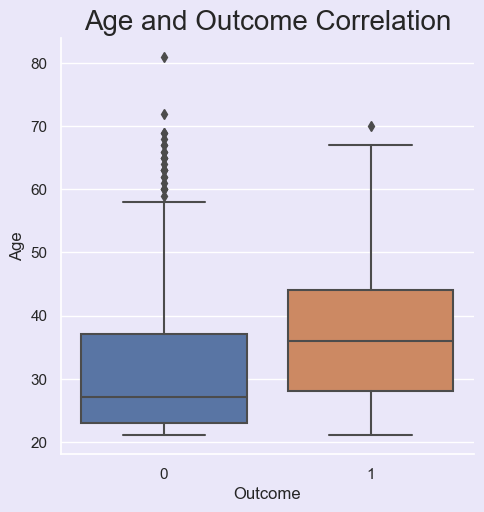

In [30]:
#age and outcome
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Outcome",y="Age", data=df, kind='box')
plt.title("Age and Outcome Correlation", size=20, y=1.0);

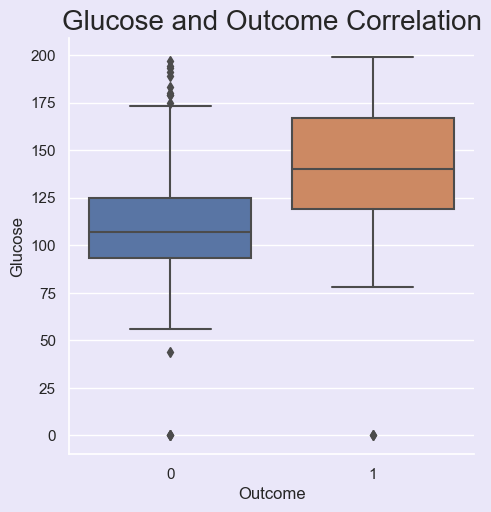

In [31]:
#glucose and outcome
sns.set(rc={"axes.facecolor":"#EAE7F9","figure.facecolor":"#EAE7F9"})
p=sns.catplot(x="Outcome",y="Glucose", data=df, kind='box')
plt.title("Glucose and Outcome Correlation", size=20, y=1.0);

In [32]:
#input and target columns
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [34]:
#model
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_jobs =-1, random_state = 42)
model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [35]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(model_2,X_train,y_train,cv=3,scoring='accuracy')


In [36]:
prediction = model.predict(X_train)
print("Accuracy of Classifier: ", model.score(X_train,y_train)*100)

Accuracy of Classifier:  100.0


In [37]:
#import pickle
import joblib

In [38]:
#dump into pickle
joblib.dump(model,'diabetic_model.joblib')

['diabetic_model.joblib']

In [39]:
#load the saved model
ob = joblib.load('diabetic_model.joblib')

In [40]:
ac1 = ob.score(X_train,y_train)
print("LR Accuracy of Classifier: {}".format(ac1*100))

LR Accuracy of Classifier: 100.0


In [41]:
from sklearn.linear_model import LogisticRegression
model_2 = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=200)
model_2.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [42]:
prediction = model_2.predict(X_test)
print("Accuracy of Classifier: ", model_2.score(X_train,y_train)*100)

Accuracy of Classifier:  78.17589576547232


In [43]:
import joblib
joblib.dump(model_2,'diabetic_model.joblib')

['diabetic_model.joblib']

In [44]:
ob2 = joblib.load('diabetic_model.joblib')
ob2.predict(X_test)
ac2=ob2.score(X_train,y_train)
print("Accuracy of Classifier: ",ac2*100)

Accuracy of Classifier:  78.17589576547232
